# Python Assignment 4 - Leveraging ArcGIS API for Python

### Connecting to the UofT ArcGIS Server using the ArcGIS Python API
The ArcGIS ecosystem is expansive, stretching from ArcGIS Online and ArcGIS Enterprise to ArcGIS Desktop. At the crossroads of this vast landscape is the ArcGIS Python API, a powerful toolkit designed to enhance automation and integration across these platforms. Its prowess is particularly evident when establishing connections to ArcGIS servers for diverse GIS operations.

#### Function Insight

The `connect_to_gis(client_id)` function stands out as a representation of this capability. Crafted to initiate a connection to the University of Toronto's ArcGIS server, it elegantly wields OAuth 2.0 for authentication. In doing so, it sets the Python API as a serverless native application, fully compatible with OAuth 2.0 authorization within the ArcGIS framework.

**A Closer Look at the Function:**
1. **Parameter Introduction**: The function kicks off by welcoming a single, pivotal parameter - `client_id`. This parameter acts as the keystone for the connection.
  
2. **Robust Error Handling**: Recognizing the intricacies of network operations, the function incorporates a try-except block. This ensures smooth error handling during the connection attempt using the `GIS` class from the `arcgis.gis` module.
  
3. **Success Acknowledgment**: Upon a successful connection, a confirmation, bearing the username of the logged-in individual, graces the user's screen.
  
4. **Error Notification**: In scenarios where the connection encounters hiccups, the user is promptly informed about the nature of the issue, ensuring clarity at all junctures.


In [1]:


from arcgis.gis import GIS

def connect_to_gis(client_id):
    """
    Connect to the UofT ArcGIS server using a client ID.
    
    This function will try to establish a connection to the ArcGIS server provided by the University of Toronto. 
    You need to give it a client ID for it to work. If everything goes smoothly, it will let you know whom 
    you've logged in as. If there's an issue, it will tell you about that instead.
    
    Parameters:
    - client_id (str): Your client ID that's needed to access the ArcGIS server.
    
    Returns:
    - GIS object: An active connection to the GIS server, if successful.
    - None: If something goes wrong.
    
    Example:
    >>> gis_connection = connect_to_gis("CLIENT_ID")
    Successfully logged in as: your_username
    """
    
    try:
        gis = GIS("https://utoronto.maps.arcgis.com", client_id=client_id, verify_cert=False)
        print(f"Successfully logged in as: {gis.properties.user.username}")
        return gis
    except Exception as e:
        print(f"Error connecting to GIS: {e}")
        return None
    

In [2]:

gis_connection = connect_to_gis(client_id="ghC945sKoVNo6Xn4")

Setting `verify_cert` to False is a security risk, use at your own risk.


Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://utoronto.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=ghC945sKoVNo6Xn4&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=4WW4RCC3tzJKqXka9GxetciWIkoH7N&allow_verification=false
Enter code obtained on signing in using SAML: ········
Successfully logged in as: ehichio1_utoronto


### Curating GIS Data with the `curate_data` Function

In the vast world of Geographic Information Systems (GIS), efficiently searching and curating specific datasets is crucial. The ArcGIS Python API acknowledges this need by offering functionalities that streamline this process. One such utility is embodied in the `curate_data` function.

#### Function Overview

The `curate_data` function serves as a refined search tool for GIS data. It harnesses the capability to narrow down searches using a combination of keywords, owner names, and specific data types. 

**Key Features:**
1. **Keyword Search**: At its core, the function uses the `keyword` parameter to initiate its search. This parameter is essential and acts as the primary filter.
  
2. **Owner Specificity**: To increase the search's precision, the function allows for an optional `owner_name`. If specified, results are limited to items owned by the stated user.
  
3. **Data Type Flexibility**: While the default search revolves around 'feature layer' items, the `item_type` parameter enables users to modify this preference, accommodating a wide range of GIS data categories.
  
4. **Result Control**: The `max_items` parameter grants users control over the number of search results, with a default cap set at 50 items.

In [3]:

def curate_data(keyword, owner_name=None, item_type='feature layer', max_items=50):
    """
    Searches for GIS items based on a given keyword and (optionally) an owner's name.
    
    This function sifts through GIS data and returns a list of items that match 
    the given keyword. If you also provide an owner's name, it'll narrow the search 
    down further to only show items owned by that person. It's like having a 
    specialized search engine for your GIS data!
    
    Parameters:
    - keyword (str): The main word or phrase you're looking for in the GIS data.
    - owner_name (str, optional): The username of the person who owns the GIS items. 
                                  If you leave this out, the search won't be specific to any owner.
    - item_type (str, optional): Kind of GIS data you're interested in. Defaults to 'feature layer'.
    - max_items (int, optional): The maximum number of search results you want. Defaults to 50.
    
    Returns:
    - list: A list of GIS items that match your search.
    
    Example:
    >>> search_results = curate_data("COVID", owner_name="fredrick")
    """
    
    if owner_name:
        query_string = f"{keyword} AND owner:{owner_name}"
    else:
        query_string = keyword
    
    items = gis_connection.content.search(query_string, item_type, outside_org=True, max_items=max_items)
    return items




### Searching GIS Data Using User Inputs

The code snippet presented enables users to search through GIS data based on specific criteria: a keyword and, optionally, an owner's name. This user-friendly approach ensures the search process is both flexible and intuitive.


#### Functioning Explained:


1. **Obtaining User Inputs**:
   - `keyword`: The main search term or phrase to find relevant GIS data.
   - `owner`: The name of the data owner. This is optional - if not provided, a global search is executed.


2. **Validating the Owner's Input**:
   - If the user skips specifying an owner (i.e., just presses enter without input), the code ensures that the variable `owner` is set to `None`. This distinction is critical because the `curate_data` function anticipates a `None` value to initiate a global search, not an empty string.


3. **Fetching and Displaying Data**:
   - Based on the provided criteria, GIS data is retrieved through the `curate_data` function.
   - Each fetched item is then displayed, prefixed with an index number, enabling easy reference for future tasks or selections.

In encapsulating this workflow, the code snippet stands as a beacon of user-centric design, making GIS data searching a breeze.


In [4]:
# Get search input from the user
keyword = input("Enter the search keyword: ")
owner = input("Enter the owner's name (or leave blank for a global search): ").strip() # strip() removes any leading/trailing spaces
 

# Check if the owner's input is empty (i.e., the user didn't provide an owner's name). 
# If it's empty, we'll set the `owner` variable to None. This is because our 
# `curate_data` function expects a None value for a global search, not an empty string.
if not owner:  
    owner = None

# Fetch items based on user's input
curated_items = curate_data(keyword, owner_name=owner)

# Display the fetched items with a callable index for reference
for idx, item in enumerate(curated_items):
    print(f"[{idx}] {item.title}")
    

Enter the search keyword: Nigeria State Boundary
Enter the owner's name (or leave blank for a global search): 
[0] Nigeria State Boundaries 2021
[1] Nigeria State Boundaries 2019
[2] Nigeria LGA Boundaries with Estimated Population and Total Vaccinations
[3] Nigeria State Boundaries Bottom layer of map to maintain country basic layer
[4] River
[5] Reservoirs
[6] EORE
[7] Anambra State
[8] 2018_Hot_Spots_Prevalence_Rate
[9] PAU Innovation Challenge; Wetlands for PVC
[10] Nigeria_Admin1_Boundaries
[11] RISE Saturation Map
[12] Summarize_Armed_Conflict_Location_e_Event_Data_Project___ACLED_
[13] Thematic States
[14] BASE_COP_Nigeria
[15] Country Map_WFL1
[16] Nigeria States Boundary
[17] Nigeria - State Boundaries
[18] Nigeria Energy_WFL1
[19] iPums_Geolevel_2_Boundaries_WFL1
[20] Nigeria - Communications Access Risk Score per State
[21] Census 2021 Immigrant Place of Birth
[22] CropPerCapita_WFL1
[23] UNEP_NGA_gdb
[24] Health facilities access risk profile in Nigeria by state
[25] Nigeri

### Processing User-Selected GIS Data Item

The function `process_selected_item` offers a seamless interface for users to select a GIS data item from a pre-curated list and subsequently fetches key properties of the chosen item. This bridges the gap between bulk data and the need for specific information.

#### Workflow Breakdown:

1. **User Prompt for Selection**:
   - The user is prompted to input the index of the desired GIS data item. The valid range is from `0` to the length of `curated_items` minus one.
   
2. **Fetching Selected Item's Details**:
   - If the user provides a valid index, the function retrieves the following properties from the selected item:
     - `title`: The title of the item.
     - `description`: A brief description or summary of the item.
     - `item_type`: The type or category of the GIS data item.
     - `url`: The URL or link pointing to the item's location or detailed page.
   - Further properties can be added as required, offering flexibility for future enhancements.

3. **Handling Invalid Inputs**:
   - Should the user input an invalid index (outside the provided range) or non-numeric characters, the function gracefully handles such scenarios by notifying the user and returning `None`.

#### Note:
Before utilizing this function, ensure that the `curated_items` list, along with their corresponding indices, has been previously displayed to the user. This guarantees clarity in selection and optimizes the user experience.


In [5]:


def process_selected_item(curated_items):
    """
    Prompts the user to select an item from the provided curated list by its index.
    Once an item is selected, retrieves and returns some of its key properties.
    
    Parameters:
    - curated_items (list): A list of items from which the user can select. 
                            Each item should have properties like title, description, type, and url.
    
    Returns:
    - dict: A dictionary containing selected properties of the chosen item.
            Returns None if an invalid index is provided.
    
    Note:
    Make sure to display the curated items to the user (with their indices) before calling this function.
    """
    
    # Ask the user to select an item by its index
    try:
        index = int(input(f"Enter the index of the item you want to process (0-{len(curated_items)-1}): "))
        selected_item = curated_items[index]
        
        # Extract some properties of the selected item
        item_details = {
            "title": selected_item.title,
            "description": selected_item.description,
            "item_type": selected_item.type,
            "url": selected_item.url,
            # You can add more properties as needed
        }
        return item_details
        
    except (ValueError, IndexError):
        print("Invalid index. Please enter a valid index from the displayed list.")
        return None
    

In [6]:
# Call the function to let the user select an item from the curated list and get its details
selected_item_details = process_selected_item(curated_items)

# If valid details were returned (i.e., the user provided a correct index and the function executed without errors)
if selected_item_details:
    # Loop through the dictionary of selected item details and display each property with its value
    for key, value in selected_item_details.items():
        print(f"{key}: {value}")
        

Enter the index of the item you want to process (0-49): 25
title: Nigeria State Boundaries
description: None
item_type: Feature Service
url: https://services3.arcgis.com/vQ3OYhyPnynK3Zqb/arcgis/rest/services/Nigeria_State_Boundaries/FeatureServer


### Visualizing GIS Data Item on a Map

The `plot_item_on_map` function is designed to facilitate visualization of GIS data items on a map. It efficiently utilizes the user's selection, represented by an index, and plots the corresponding GIS data item on a map using the ArcGIS Python API.

#### Workflow Description:

1. **Input Validity Check**:
   - Before any plotting is done, the function verifies that the provided `selected_index` is within the acceptable range of indices in `curated_items`.
   
2. **Map Initialization**:
   - A new map widget is initialized using the established GIS connection. This provides a blank canvas on which the GIS data item can be visualized.
   
3. **Item Layer Addition**:
   - The GIS data item, as indicated by the `selected_index`, is added as a layer on the initialized map.
   - To ensure the user's choice was accurately interpreted, the title of the selected GIS data item is printed for confirmation.
   
4. **Associated Table Data Retrieval (Optional)**:
   - Some GIS items come with an associated table data. If present, the function makes an attempt to query this table and convert it into a Spatial DataFrame.
   - It's essential to note that this operation might not be successful for all GIS items, as not all come with query-able associated table data.
   
5. **Return and Error Handling**:
   - The function then returns the updated map widget, presenting the user with a visual representation of the selected GIS data item.
   - In case the `selected_index` is invalid (outside the range of curated items), the function prints an error message and returns `None`.

#### Usage Insight:

Use this function when you want to provide users with an interactive way of visualizing specific GIS data items. It's not just about seeing a list but about diving deep into the spatial representation of each data item.


In [7]:
def plot_item_on_map(selected_index, curated_items):
    """
    Takes a selected item index and a list of curated items and attempts to plot the selected item on a map. 
    
    Parameters:
    - selected_index (int): Index of the selected item from the curated items list.
    - curated_items (list): List of curated GIS items.
    
    Returns:
    - Map widget with the selected layer added, if the index is valid.
    - None and a printed error message if the index is invalid.
    """
    
    # Check if the provided index is within the range of available items
    if 0 <= selected_index < len(curated_items):
        # Initialize a new map widget
        map_to_be_plotted = gis_connection.map()
        
        # Get the item corresponding to the selected index
        selected_item = curated_items[selected_index]
        
        # Add the selected item as a layer to the map
        map_to_be_plotted.add_layer(selected_item)
        
        # Print the title of the selected item for user confirmation
        print(f"\n[{selected_index}] {selected_item.title}\n")
        
        # Attempt to retrieve associated table data for the selected item
        # Note: This is a potential operation and might not work for all items
        associated_table_data = None
        if hasattr(selected_item, 'tables') and selected_item.tables:
            # If the item has an associated table, query the table to a Spatial DataFrame
            # (assuming the first table can be directly queried)
            associated_table_data = selected_item.tables[0].query().sdf
        
        # Return the updated map widget
        return map_to_be_plotted
    
    # If the provided index is out of range
    else:
        print("Invalid index. Please provide a valid index from the curated list.")
        
        # Return None to indicate the map plotting was unsuccessful
        return None
    

### Visualizing GIS Data on a Map

The code facilitates the visualization of GIS data in Jupyter:

1. **Prompt**: User provides an index of the desired GIS item.
2. **Visualization**: The item corresponding to the index is plotted using `plot_item_on_map`.
3. **Display**: If successful, the map is rendered in the Jupyter Notebook.

This allows for quick and interactive exploration of curated GIS data.


In [8]:
# Prompt the user to provide an index from the curated items.
# The index is used to choose which item the user wants to plot on a map.
selected_index_prompt = f"Enter the index of the item you want to plot on the map (0-{len(curated_items)-1}): "

# The input function is used to capture user input, 
# and the int function is used to convert the user's input into an integer.
selected_index = int(input(selected_index_prompt))

# The function plot_item_on_map takes the user-provided index and the curated list 
# to plot the corresponding GIS item on a map.
# If the index is valid, it returns a map widget; otherwise, it returns None.
map_widget = plot_item_on_map(selected_index, curated_items)

# If a map widget is successfully created (i.e., it's not None), display the map.
# The `display` function is commonly used in Jupyter Notebook environments to render objects.
if map_widget:
    display(map_widget)
    

Enter the index of the item you want to plot on the map (0-49): 25

[25] Nigeria State Boundaries



MapView(layout=Layout(height='400px', width='100%'))

## Extracting Spatial Data: `get_sdf_from_index` Function

The `get_sdf_from_index` function is an interactive interface designed to assist users in extracting spatial data from a chosen GIS item within a curated list.

### **Overview:**

**Purpose:**  
Facilitate on-demand retrieval of spatial data by allowing users to select an item based on its index. 

### **Key Components:**

1. **User Interaction:**  
   - The user is prompted to select a GIS item by providing its index from a displayed list.
   - Error handling ensures that the user's input is both numeric and within the valid index range.

2. **Data Processing:**  
   - **Layer Verification:** The function first checks if the selected item contains any spatial layers.
   - **Data Conversion:** If spatial layers are present, the first layer's data is converted into a Spatial DataFrame (sdf), which marries the capabilities of a pandas DataFrame with spatial capabilities.
   - **Geometry Type Display:** For added context, the geometry type of the sdf (e.g., points, polygons) is printed, giving users an immediate sense of the data structure.

3. **Output:**  
   - **Success:** Returns the sdf, ready for further data exploration or analysis.
   - **Failures:** In scenarios where the index is invalid, or if the selected item lacks spatial data, the function returns `None` with a user-friendly message indicating the nature of the issue.

### **Usage:**  
After compiling a list of GIS items, calling `get_sdf_from_index(items)` initiates the process. If successful, users can further process or visualize the returned sdf, like using `sdf.head()` to inspect the first few rows.


In [9]:
def get_sdf_from_index(curated_items):
    """
    This function prompts the user to select an item based on its index from a provided list 
    of curated items. After the user makes a selection, the function fetches the associated 
    Spatial DataFrame (sdf) for that item. The sdf is a representation of geographic features 
    (like points, lines, or polygons) combined with tabular data in a pandas DataFrame format, 
    making it ideal for both spatial and non-spatial analyses.

    The main use-case for this function is to facilitate the retrieval of spatial data from 
    a user-selected item in an interactive manner. By allowing the user to specify an index, 
    it ensures a targeted extraction of data, preventing accidental data downloads or unintended 
    data processing. 

    Parameters:
    -----------
    curated_items : list
        A list of curated items, typically fetched from a GIS content search. Each item 
        in the list represents a distinct GIS asset that could have spatial data 
        associated with it.

    Returns:
    --------
    Spatial DataFrame (sdf) or None:
        If the selected item contains spatial data, the function returns an sdf.
        If there's no spatial data (i.e., the item lacks layers), the function 
        returns None. Similarly, if the user provides an invalid index or another 
        error occurs, the function also returns None.

    Example:
    --------
    items = search_gis_for_content("parks")  # Assume this function searches GIS for "parks".
    sdf = get_sdf_from_index(items)
    if sdf:
        print(sdf.head())  # Display the first few rows of the sdf.
    """
    # The user is asked to input an index to select an item from the list.
    try:
        index = int(input(f"Enter the index of the item you want to retrieve (0-{len(curated_items)-1}): "))
        # The selected item is fetched using the provided index.
        selected_item = curated_items[index]
        
        # We check if the selected item has layers associated with it.
        # If it does, we retrieve the first layer.
        if selected_item.layers:
            feature_layer = selected_item.layers[0]
            # We query the layer to get a set of features (data points or shapes).
            feature_set = feature_layer.query()
            
            # Displaying the geometry type helps in understanding the type of data in the layer
            # (e.g., points, polygons, lines, etc.).
            print(f"\nGeometry Type: {feature_set.geometry_type}\n")
            
            # Convert the feature set into a Spatial DataFrame for easier data manipulation.
            sdf = feature_set.sdf
            
            # Return the sdf to the calling function or script.
            return sdf
        
        else:
            # If the selected item doesn't have layers, inform the user.
            print(f"\nThe selected item at index {index} does not have layers.")
            return None
            
    except (ValueError, IndexError):
        # Catch common errors like:
        # 1) The user inputs a non-numeric value (ValueError)
        # 2) The user inputs an index that's out of range (IndexError)
        print("Invalid index. Please enter a valid index from the displayed list.")
        return None
    

In [10]:
# Usage:
sdf_table = get_sdf_from_index(curated_items)
sdf_table


Enter the index of the item you want to retrieve (0-49): 25

Geometry Type: esriGeometryPolygon



,FID,globalid,uniq_id,timestamp,editor,statename,statecode,capcity,source,geozone,SHAPE_Length,SHAPE_Area,ObjectId,Shape__Area,Shape__Length,SHAPE
0,1,c46ae452-d6b6-4618-b3f7-ed6015e978d7,1187,2018-12-13,abraham.oluseye,Cross River,CR,Calabar,eHA_Polio,SSZ,7.724765,1.714579,1,21360217262.768002,862266.900737,"{""rings"": [[[941847.107420953, 529882.76663914..."
1,2,0e73256c-2793-44cc-ab1b-7289f145b866,1175,2018-12-13,abraham.oluseye,Fct,FC,Abuja,eHA_Polio,NCZ,3.586395,0.626374,2,7856579395.21643,401962.990877,"{""rings"": [[[832405.236244999, 964490.58514770..."
2,3,7f0787e4-4518-4486-8bc5-51c5232df9d1,1190,2019-07-29,nuraddeen.isah,Ogun,OG,Abeokuta,eHA_Polio,SWZ,9.681486,1.369475,3,17098165832.566799,1081853.511578,"{""rings"": [[[511797.327093942, 709514.20828273..."
3,4,0edbae77-0091-40d9-afdf-7e249ed797fb,1191,2019-07-29,nuraddeen.isah,Oyo,OY,Ibandan,eHA_Polio,SWZ,8.661401,2.273367,4,28460608472.460899,969319.014641,"{""rings"": [[[445162.579852978, 795379.76336152..."
4,5,143c5cd1-9f44-4935-ab8a-891e4c05451e,1177,2018-12-13,abraham.oluseye,Sokoto,SO,Sokoto,eHA_Polio,NWZ,11.50623,2.587038,5,32910895034.431099,1294731.116161,"{""rings"": [[[515704.754655343, 1308337.0558614..."
5,6,580df05c-a031-4664-962b-b326bfb53c78,1178,2018-12-13,abraham.oluseye,Zamfara,ZA,Gusau,eHA_Polio,NWZ,10.75332,2.847185,6,36088383564.824699,1210556.586585,"{""rings"": [[[731596.288539338, 1234618.2587700..."
6,7,16fa258c-be83-44c4-836e-d4768129a329,1179,2019-07-17,nuraddeen.isah,Lagos,LA,Lagos,eHA_Polio,SWZ,4.360711,0.307617,7,3836832718.69904,486081.306387,"{""rings"": [[[336270.684402398, 713600.03800437..."
7,8,83fe39c7-8a62-4bb9-8cf7-8f2b58b5c276,1193,2018-12-13,abraham.oluseye,Akwa Ibom,AK,Uyo,eHA_Polio,SSZ,3.770538,0.560026,8,6965447570.20428,420555.088281,"{""rings"": [[[839486.488353758, 527416.06390478..."
8,9,c92e2ed6-a32c-4b10-b084-1243d6a40178,1194,2018-12-13,abraham.oluseye,Bayelsa,BY,Yenagoa,eHA_Polio,SSZ,5.287061,0.765385,9,9517764498.55069,589599.041204,"{""rings"": [[[683112.874898336, 476316.47801180..."
9,10,5281552e-e3cc-4aeb-a6ff-3f7a4ef3d464,1195,2018-12-13,abraham.oluseye,Ondo,ON,Akure,eHA_Polio,SWZ,7.63993,1.231347,10,15371061873.294001,853796.747054,"{""rings"": [[[560408.459924436, 667880.34990311..."


## Combining Spatial and Tabular Data: `join_sdf_with_excel` Function

The `join_sdf_with_excel` function bridges the gap between spatial data (often housed in DataFrames) and attribute data commonly stored in Excel sheets.

### **Overview:**

**Purpose:**  
- Enable seamless merging of dataframes with data from Excel files, providing a unified dataset for comprehensive analysis.

### **Key Components:**

1. **Data Reading:**  
   - The function begins by reading data from an Excel file and converting it into a pandas DataFrame. This step prepares the data for the forthcoming join operation.

2. **DataFrame Type Recognition:**  
   - It identifies whether the provided DataFrame (`sdf`) is a pandas DataFrame or a Spark DataFrame. Recognizing this distinction is crucial since joining operations would employ pandas' functionalities.
   - If the `sdf` is identified as a Spark DataFrame, an automatic conversion to pandas DataFrame takes place, ensuring compatibility.

3. **Data Joining:**  
   - Using the powerful `pd.merge` function, the DataFrame (`sdf`) and the Excel data are joined. 
   - The fields serving as keys for the join operation are specified through the parameters `join_fields_sdf` and `join_fields_excel`.
   - The function accommodates various join types: inner, left, right, and outer, enhancing its flexibility based on user requirements.

4. **Resultant Output:**  
   - **Success:** The merged data is returned as a pandas DataFrame. This combined dataset can then be subjected to further analysis, visualization, or processing.
   - **Potential Pitfalls:** Should there be mismatches in keys or issues with file access, appropriate exceptions are raised to notify the user of the problem.

### **Usage:**  
Initiate the data combination process by calling `join_sdf_with_excel(sdf, excel_path, join_fields_sdf, join_fields_excel)`. Post successful execution, the returned DataFrame can be inspected or manipulated further as needed, for example, with `result_df.head()` to glimpse the initial few rows. 

In a GIS and data analysis context, this function acts as a crucial utility, ensuring that spatial data can easily be supplemented with attributes stored in widely-used Excel format, yielding richer, more insightful datasets.


In [15]:
import pandas as pd

def join_sdf_with_excel(sdf, excel_path, join_fields_sdf, join_fields_excel, join_type='inner'):
    """
    Join a DataFrame (possibly originating from Spark) with data from an Excel file based on specified join fields.
    
    This function serves as a bridge between data stored in different formats. It takes in 
    a DataFrame (either a pandas DataFrame or a Spark DataFrame) and an Excel file, and 
    joins them on specified fields. Such a utility can be especially useful when combining 
    spatial data (often represented as DataFrames) with attribute data stored in Excel.
    
    Parameters:
    -----------
    sdf : DataFrame (either pandas or Spark)
        The DataFrame containing the primary data. This can be either a pandas DataFrame or 
        a Spark DataFrame. If it's a Spark DataFrame, it will be automatically converted to 
        pandas for the join operation.
    
    excel_path : str
        Path to the Excel file that contains the data to be joined with the sdf.
    
    join_fields_sdf : list of str
        Fields in the sdf (DataFrame) that will be used as keys for the join.
    
    join_fields_excel : list of str
        Fields in the Excel file that will be used as keys for the join.
    
    join_type : str, default 'inner'
        Type of join operation to be performed. Options include:
        - 'inner': Use intersection of keys from both DataFrames.
        - 'left': Use only keys from the sdf (left DataFrame).
        - 'right': Use only keys from the Excel file (right DataFrame).
        - 'outer': Use union of keys from both DataFrames.
    
    Returns:
    --------
    DataFrame (pandas)
        A pandas DataFrame resulting from the join operation between the provided sdf and 
        Excel data. If the join operation cannot be completed due to an error (e.g., mismatched 
        keys, file not found), the function may raise an appropriate exception.

    Example:
    --------
    sdf = some_data_fetching_function()  # Assume this returns a DataFrame.
    excel_data_path = "path/to/excel_data.xlsx"
    result_df = join_sdf_with_excel(sdf, excel_data_path, ['field1'], ['field2'])
    print(result_df.head())
    """
    
    # Read the Excel file into a pandas DataFrame
    df_excel = pd.read_excel(excel_path)

      # Check if the provided dataframe is a Spark DataFrame
    if isinstance(sdf, pd.DataFrame):
        df_spark = sdf
    else:
        # Convert the Spark DataFrame to a pandas DataFrame
        df_spark = sdf.toPandas()

    # Join the dataframes using the specified fields and join type
    result = pd.merge(df_spark, df_excel, left_on=join_fields_sdf, right_on=join_fields_excel, how=join_type)

    return result


In [17]:
# you want to join on the fields "id" in the SDF and "ID" in the Excel sheet
result_df = join_sdf_with_excel(sdf_table, "C:\\Users\\ehich\\OneDrive\\Desktop\\Nigerian Covid Data.xlsx", ["statename"], ["States Affected"])
result_df


,FID,globalid,uniq_id,timestamp,editor,statename,statecode,capcity,source,geozone,...,SHAPE_Area,ObjectId,Shape__Area,Shape__Length,SHAPE,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,1,c46ae452-d6b6-4618-b3f7-ed6015e978d7,1187,2018-12-13,abraham.oluseye,Cross River,CR,Calabar,eHA_Polio,SSZ,...,1.714579,1,21360217262.768002,862266.900737,"{""rings"": [[[941847.107420953, 529882.76663914...",Cross River,947,0,922,25
1,2,0e73256c-2793-44cc-ab1b-7289f145b866,1175,2018-12-13,abraham.oluseye,Fct,FC,Abuja,eHA_Polio,NCZ,...,0.626374,2,7856579395.21643,401962.990877,"{""rings"": [[[832405.236244999, 964490.58514770...",Fct,29535,9,29277,249
2,3,7f0787e4-4518-4486-8bc5-51c5232df9d1,1190,2019-07-29,nuraddeen.isah,Ogun,OG,Abeokuta,eHA_Polio,SWZ,...,1.369475,3,17098165832.566799,1081853.511578,"{""rings"": [[[511797.327093942, 709514.20828273...",Ogun,5810,11,5717,82
3,4,0edbae77-0091-40d9-afdf-7e249ed797fb,1191,2019-07-29,nuraddeen.isah,Oyo,OY,Ibandan,eHA_Polio,SWZ,...,2.273367,4,28460608472.460899,969319.014641,"{""rings"": [[[445162.579852978, 795379.76336152...",Oyo,10352,0,10150,202
4,5,143c5cd1-9f44-4935-ab8a-891e4c05451e,1177,2018-12-13,abraham.oluseye,Sokoto,SO,Sokoto,eHA_Polio,NWZ,...,2.587038,5,32910895034.431099,1294731.116161,"{""rings"": [[[515704.754655343, 1308337.0558614...",Sokoto,822,0,794,28
5,6,580df05c-a031-4664-962b-b326bfb53c78,1178,2018-12-13,abraham.oluseye,Zamfara,ZA,Gusau,eHA_Polio,NWZ,...,2.847185,6,36088383564.824699,1210556.586585,"{""rings"": [[[731596.288539338, 1234618.2587700...",Zamfara,375,0,366,9
6,7,16fa258c-be83-44c4-836e-d4768129a329,1179,2019-07-17,nuraddeen.isah,Lagos,LA,Lagos,eHA_Polio,SWZ,...,0.307617,7,3836832718.69904,486081.306387,"{""rings"": [[[336270.684402398, 713600.03800437...",Lagos,104286,1143,102372,771
7,8,83fe39c7-8a62-4bb9-8cf7-8f2b58b5c276,1193,2018-12-13,abraham.oluseye,Akwa Ibom,AK,Uyo,eHA_Polio,SSZ,...,0.560026,8,6965447570.20428,420555.088281,"{""rings"": [[[839486.488353758, 527416.06390478...",Akwa Ibom,5010,6,4960,44
8,9,c92e2ed6-a32c-4b10-b084-1243d6a40178,1194,2018-12-13,abraham.oluseye,Bayelsa,BY,Yenagoa,eHA_Polio,SSZ,...,0.765385,9,9517764498.55069,589599.041204,"{""rings"": [[[683112.874898336, 476316.47801180...",Bayelsa,1373,2,1343,28
9,10,5281552e-e3cc-4aeb-a6ff-3f7a4ef3d464,1195,2018-12-13,abraham.oluseye,Ondo,ON,Akure,eHA_Polio,SWZ,...,1.231347,10,15371061873.294001,853796.747054,"{""rings"": [[[560408.459924436, 667880.34990311...",Ondo,5173,315,4749,109


## Visualizing Regional Data with `create_choropleth_gpd`

The `create_choropleth_gpd` function stands as an integral tool for geospatial visualizations. Crafted atop geopandas and matplotlib, it presents regional data in the form of a captivating choropleth map. Choropleth maps, distinguished by their shades, intuitively depict data quantities across regions, offering users a clear spatial insight into the data.

### **Overview:**

**Purpose:**  
Render raw regional data into an engaging choropleth map, enabling users to quickly discern spatial patterns and disparities.

### **Key Features:**

1. **GeoDataFrame Transformation:**  
   - The initial dataframe undergoes metamorphosis into a GeoDataFrame, priming it for spatial plotting.

2. **Choropleth Visualization:**  
   - Leveraging matplotlib, the function delineates each region based on the data's magnitude, with varying color intensities.
   - The gradation of colors—often moving from lighter to darker shades—represent the range of data values, giving depth to the visualization.

3. **Regional Annotations:**  
   - To further aid user understanding, the centroids of these regions are elegantly annotated with their corresponding names, ensuring clarity.

4. **Flexibility and Customization:**  
   - Accommodating varied datasets, the function allows users to specify which columns in the dataframe correspond to geographical identifiers, data values, and even the names of regions. This ensures the tool's applicability across diverse data structures.

### **Usage Scenario:**  
Imagine having a dataset detailing the population density of each state. By invoking `create_choropleth_gpd(data, 'geometry', 'population_density', 'Population Density per State')`, one could effortlessly produce a choropleth map, visually unraveling regions of dense versus sparse populations.

**Note:** For those seeking to emphasize regional boundaries, a simple tweak—uncommenting the `gdf.boundary.plot` line—will render borders in stark contrast, adding definition to the regions.


In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

def create_choropleth_gpd(dataframe, geo_column, data_column, map_title, state_name_column='statename'):
    """
    Generate a choropleth map to visualize region-wise data, using geopandas and matplotlib.
    
    This function takes in a DataFrame with geographical identifiers and data columns to produce 
    a choropleth map. The regions (like states) are shaded based on the data values, providing a 
    spatial understanding of the dataset. Additionally, the centroids of the regions are annotated 
    with their respective names.
    
    Parameters:
    -----------
    dataframe : pandas.DataFrame
        The DataFrame containing the spatial data and the values to be visualized. The dataframe 
        should have columns corresponding to the geographical identifiers, the data to be visualized,
        and optionally, the names of the regions.
    
    geo_column : str
        Name of the column in the dataframe that contains the geographical identifiers (like polygons 
        for states). This column is used for plotting the regions.
    
    data_column : str
        Name of the column in the dataframe that contains the data values to be visualized. These 
        values determine the shade of the regions in the choropleth map.
    
    map_title : str
        The title to be displayed at the top of the choropleth map.
    
    state_name_column : str, optional, default 'state_name'
        Name of the column in the dataframe that contains the names of the regions (like state names).
        These names are annotated at the centroids of the regions on the map.
    
    Returns:
    --------
    None
        The function directly visualizes the map using matplotlib. It does not return any values.
    
    Raises:
    -------
    ValueError:
        If essential columns (like geo_column or data_column) are not found in the provided dataframe.
    
    Example:
    --------
    data = pd.read_csv('path/to/data.csv')
    create_choropleth_gpd(data, 'geometry', 'population_density', 'Population Density per State')
    """

    # Convert the dataframe to a GeoDataFrame
    gdf = gpd.GeoDataFrame(dataframe, geometry='SHAPE')

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    #gdf.boundary.plot(ax=ax, color='black') (this is commentaed out and can be reinitailized if you want to darken the boundaries)
    gdf.plot(column=data_column, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    
    # Annotating state names
    for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf[state_name_column]):
        ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points", fontsize=9, color="black")

    ax.set_title(map_title)
    plt.show()
    
    

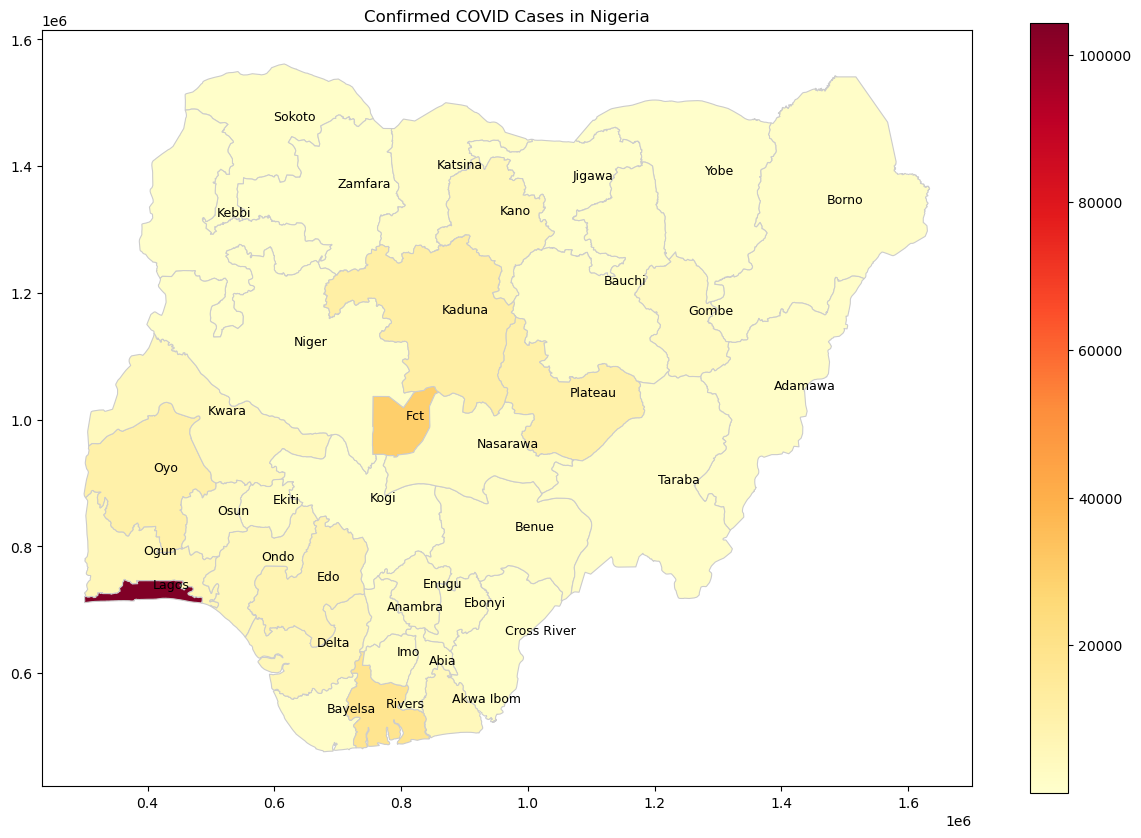

In [22]:
# Usage
create_choropleth_gpd(result_df, 'statename', 'No. of Cases (Lab Confirmed)', 'Confirmed COVID Cases in Nigeria')

## Creating Insightful Visualizations with `create_bubble_map`

The `create_bubble_map` function seamlessly transforms raw spatial data into vibrant bubble maps, utilizing the power of geopandas and matplotlib. Unlike traditional maps, bubble maps highlight data disparities not by shading but by varying bubble sizes and colors, offering a fresh visual perspective to discern data patterns.

### **Overview:**

**Purpose:**  
Craft a dynamic bubble map from a dataset, with bubbles sized and colored according to the data's magnitude and its risk categorization, respectively.

### **Key Features:**

1. **GeoDataFrame Conversion:**  
   - The raw dataframe undergoes a transformation into a GeoDataFrame, setting the stage for spatial visualizations.

2. **Risk Categorization:**  
   - Data isn't just presented; it's categorized into risk levels. This categorization drives the bubble's color, with varied hues representing different levels of risk.

3. **Dynamic Bubble Visualization:**  
   - The function renders bubbles atop each region. The size resonates with the data's value, while the color mirrors its risk category. This dual encoding offers depth to the visualization.

4. **Centroid Annotations:**  
   - To enhance clarity, the centroids of regions are meticulously annotated with their respective names.

5. **High Customizability:**  
   - Users have the freedom to specify dataframe columns corresponding to geographical features, data values, and region names. Such flexibility ensures the function's adaptability across varied datasets.

### **Usage Scenario:**  
Envision having a dataset detailing pollution levels across different states. By executing `create_bubble_map(data, 'geometry', 'pollution_level', 'Pollution Levels across States')`, a user can instantly generate a bubble map. Larger, red bubbles would hint at high pollution (and higher risk), while smaller, green bubbles would suggest cleaner areas.

**Note:** This function holds immense potential for myriad applications, from environmental monitoring to tracking health metrics across regions.


In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

def create_bubble_map(dataframe, geo_column, data_column, map_title, state_name_column='statename'):
    """
    Generate a bubble map visualizing region-wise data using geopandas and matplotlib.
    
    This function creates a bubble map, where the size of each bubble corresponds to the value of 
    data in a given region. Additionally, the data values are categorized into risk categories, which
    determine the color of the bubbles. The centroids of the regions (like states) are also annotated 
    with their respective names.
    
    Parameters:
    -----------
    dataframe : pandas.DataFrame
        The DataFrame containing the spatial data and values to be visualized. The dataframe should 
        have columns corresponding to geographical identifiers, the data to be visualized, and the 
        names of the regions.
    
    geo_column : str
        Name of the column in the dataframe that contains the geographical identifiers (like polygons 
        for states). This column is used for plotting the regions.
    
    data_column : str
        Name of the column in the dataframe that contains the data values to be visualized. These 
        values determine the size and color of the bubbles on the map.
    
    map_title : str
        The title to be displayed at the top of the bubble map.
    
    state_name_column : str, optional, default 'state_name'
        Name of the column in the dataframe that contains the names of the regions (like state names).
        These names are annotated at the centroids of the regions on the map.
    
    Returns:
    --------
    None
        The function directly visualizes the map using matplotlib. It does not return any values.
    
    Raises:
    -------
    ValueError:
        If essential columns (like geo_column or data_column) are not found in the provided dataframe.
    
    Example:
    --------
    data = pd.read_csv('path/to/data.csv')
    create_bubble_map(data, 'geometry', 'population_density', 'Population Density per State')
    """
    
    # [function body remains the same]

    
    # Convert the dataframe to a GeoDataFrame
    gdf = gpd.GeoDataFrame(dataframe, geometry='SHAPE')

    # Create a new column for risk categories
    gdf['risk_category'] = pd.cut(gdf[data_column], 
                                  bins=[0, 100, 500, 1000, 5000, gdf[data_column].max() + 1], 
                                  labels=['Very Low Risk', 'Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk'], 
                                  right=False)

    # Define colors for each risk category
    risk_colors = {
        'Very Low Risk': 'lightgreen',
        'Low Risk': 'green',
        'Medium Risk': 'yellow',
        'High Risk': 'orange',
        'Very High Risk': 'red'
    }

    # Plotting the base map
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    gdf.boundary.plot(ax=ax, linewidth=1)

    # Plotting the bubbles
    for risk, color in risk_colors.items():
        gdf[gdf['risk_category'] == risk].plot(ax=ax, 
                                               marker='o', 
                                               markersize=gdf[data_column] * 0.05,  # adjusted size factor
                                               color=color, 
                                               legend=True)
    
    # Annotating state names
    for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf[state_name_column]):
        ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points", fontsize=9, color="black")
    
    ax.set_title(map_title)
    plt.show()
    

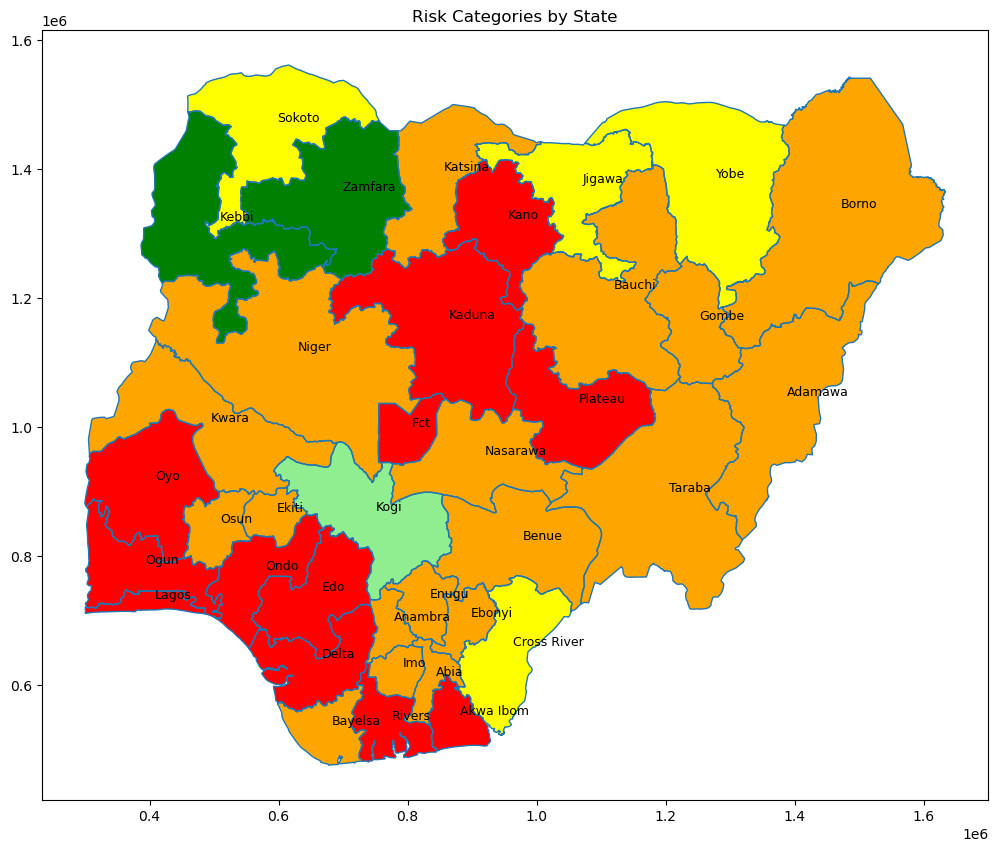

In [24]:
# Using the function
create_bubble_map(result_df, 'geometry_t', 'No. of Cases (Lab Confirmed)', 'Risk Categories by State')

## **Exploring My ArcGIS Profile: Interactive Map Retrieval**

Within the realm of GIS, ArcGIS stands out as a platform that allows users to host, share, and explore spatial datasets. This next couple of code details the procedure used to efficiently search and display maps from my own ArcGIS profile. I leverage the functionalities of the functions I created in the previous sections.


In [26]:
# Usage
keyword = input("Enter the search keyword: ")
owner = input("Enter the owner's name (or leave blank for a global search): ").strip()  # strip() removes any leading/trailing spaces

if not owner:  # If owner name is empty, set it to None
    owner = None

owner_items = curate_data(keyword, owner_name=owner)

# Displaying the items
for idx, item in enumerate(owner_items):
    print(f"[{idx}] {item.title}")
    

Enter the search keyword: Nigeria
Enter the owner's name (or leave blank for a global search): ehichio1_utoronto
[0] Nigeria Covid-19 cases by state


In [27]:
# Usage
owner_item_details = process_selected_item(owner_items)

# Displaying the details of the selected item
if owner_item_details:
    for key, value in owner_item_details.items():
        print(f"{key}: {value}")
        

Enter the index of the item you want to process (0-0): 0
title: Nigeria Covid-19 cases by state
description: None
item_type: Feature Service
url: https://services1.arcgis.com/9NvE8jKNWWlDGsUJ/arcgis/rest/services/a224e8/FeatureServer


In [28]:
# Prompt the user to select an index
selected_index_prompt = f"Enter the index of the item you want to plot on the map (0-{len(owner_items)-1}): "
selected_index = int(input(selected_index_prompt))

map_widget = plot_item_on_map(selected_index, owner_items)

if map_widget:
    display(map_widget)  # This line assumes you're working within an environment that can display the map, like Jupyter.
    

Enter the index of the item you want to plot on the map (0-0): 0

[0] Nigeria Covid-19 cases by state



MapView(layout=Layout(height='400px', width='100%'))

## References

1. **OpenAI & ChatGPT Assistance**:
   - [OpenAI. (2022). ChatGPT Guidance and Information Retrieval.](https://www.openai.com/products/chatgpt/)

2. **NCDC Covid Data for Nigeria**:
   - [Nigeria Centre for Disease Control (NCDC). (2023). COVID-19 Nigeria.](https://covid19.ncdc.gov.ng/)

3. **Esri & ArcGIS Documentation**:
   - [Esri. (2022). ArcGIS Pro Documentation.](https://pro.arcgis.com/en/pro-app/latest/documentation/)
   - [Esri. (2022). ArcPy – ArcGIS Automation with Python.](https://developers.arcgis.com/python/guide/what-is-arcpy/)

